In [2]:

# import modules# impor 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.svm import SVC

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [9]:
def  plotData(X, y):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=60, c='k', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=60, c='y', marker='o', linewidths=1)

In [10]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plotData(X, y)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [11]:
data1 = loadmat('E:\\BaiduYunDownload\\Andrew NG\\machinelearning.ai\\机器学习课程源代码\\mlclass-ex6-jin\\ex6data1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [12]:
y1 = data1['y']
X1 = data1['X']

print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


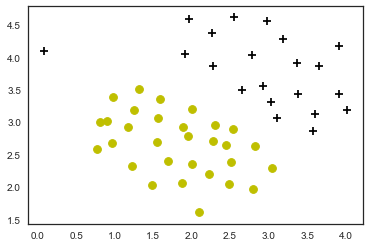

In [13]:
plotData(X1,y1)

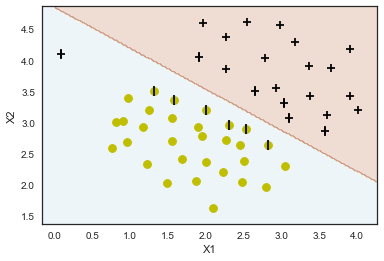

Number of support vectors:  12


In [14]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

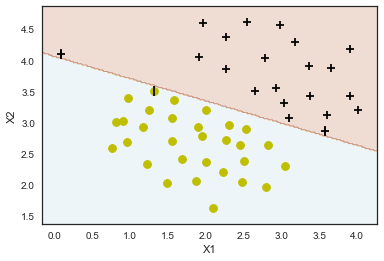

Number of support vectors:  3


In [15]:
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

In [16]:
def gaussianKernel(x1, x2, sigma=2):
    norm = (x1-x2).T.dot(x1-x2)
    return(np.exp(-norm/(2*sigma**2)))

In [17]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussianKernel(x1, x2, sigma)

0.32465246735834974

In [18]:
data2 = loadmat('E:\\BaiduYunDownload\\Andrew NG\\machinelearning.ai\\机器学习课程源代码\\mlclass-ex6-jin\\ex6data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [19]:
y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


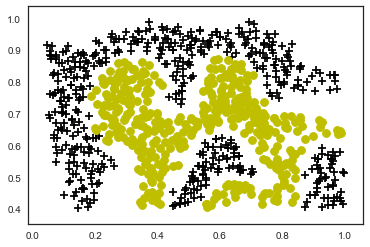

In [20]:
plotData(X2, y2)

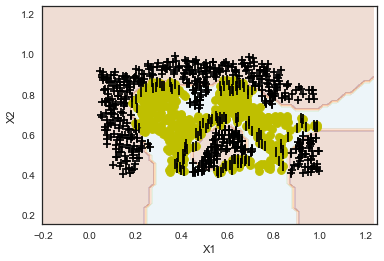

Number of support vectors:  254


In [21]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

In [23]:
data3 = loadmat('E:\\BaiduYunDownload\\Andrew NG\\machinelearning.ai\\机器学习课程源代码\\mlclass-ex6-jin\\ex6data2.mat')
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [24]:
y3 = data3['y']
X3 = data3['X']

print('X3:', X3.shape)
print('y3:', y3.shape)

X3: (863, 2)
y3: (863, 1)


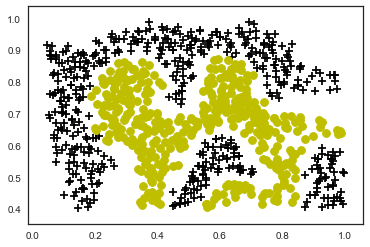

In [25]:
plotData(X3, y3)

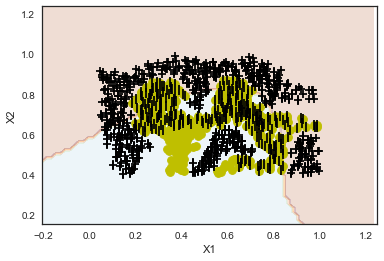

Number of support vectors:  627


In [26]:
clf3 = SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)

In [27]:
data4 = pd.read_table('C:\\Users\\Administrator\\Documents\\GitHub\\CourseraML\\ex6\\data\\vocab.txt', header=None)
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 2 columns):
0    1899 non-null int64
1    1898 non-null object
dtypes: int64(1), object(1)
memory usage: 29.8+ KB


In [28]:
data4.head()

   0      1
0  1     aa
1  2     ab
2  3   abil
3  4    abl
4  5  about